- Error bars (so need sem array to pass into yerr=)
- titles and labels
- 3 trends
...
- maybe recode the mouse_id to be an integer? 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
drugsdf = pd.read_csv('raw_data/mouse_drug_data.csv')
tumors = pd.read_csv('raw_data/clinicaltrial_data.csv')

## Preprocessing

In [3]:
data = pd.merge(drugsdf, tumors, how='inner')

In [4]:
data.shape

(1906, 5)

In [5]:
data = data.rename(columns={\
                            'Mouse ID': 'mouse_id',\
                            'Tumor Volume (mm3)': 'tumor_vol',\
                            'Metastatic Sites': 'mets'})

In [6]:
##filter for drugs of interest
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
mask_drugs = data['Drug'].isin(drugs)
data_drugs = data[mask_drugs]

## Tumor Volume
Scatter plot: tumor volume changes over time for each treatment 

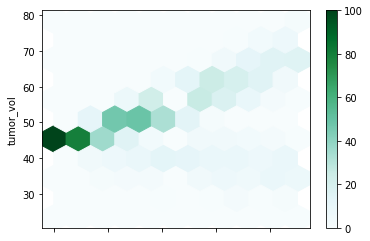

In [7]:
data_drugs.plot.hexbin(x = "Timepoint", y = 'tumor_vol', gridsize=10);

In [8]:
capomulin = data[data.Drug == "Capomulin"]
infubinol = data[data.Drug == "Infubinol"]
ketapril = data[data.Drug == "Ketapril"]
placebo = data[data.Drug == "Placebo"]

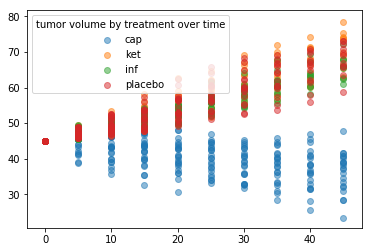

In [9]:
#make subplots? facetgrid? 
plt.scatter(capomulin.Timepoint, capomulin.tumor_vol, label='cap', alpha=0.5)
plt.scatter(ketapril.Timepoint, ketapril.tumor_vol, label='ket', alpha=0.5)
plt.scatter(infubinol.Timepoint, infubinol.tumor_vol, label='inf', alpha=0.5)
plt.scatter(placebo.Timepoint, placebo.tumor_vol, label='placebo', alpha=0.5)
plt.legend(loc='best', title='tumor volume by treatment over time', fancybox=True)

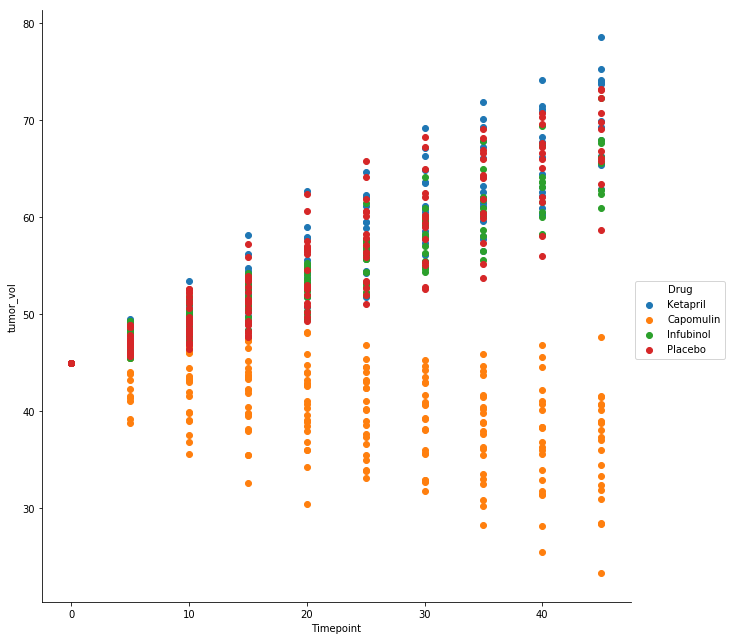

In [10]:
sns.FacetGrid(data_drugs, hue="Drug", size=9,) \
   .map(plt.scatter, "Timepoint", "tumor_vol") \
   .add_legend();

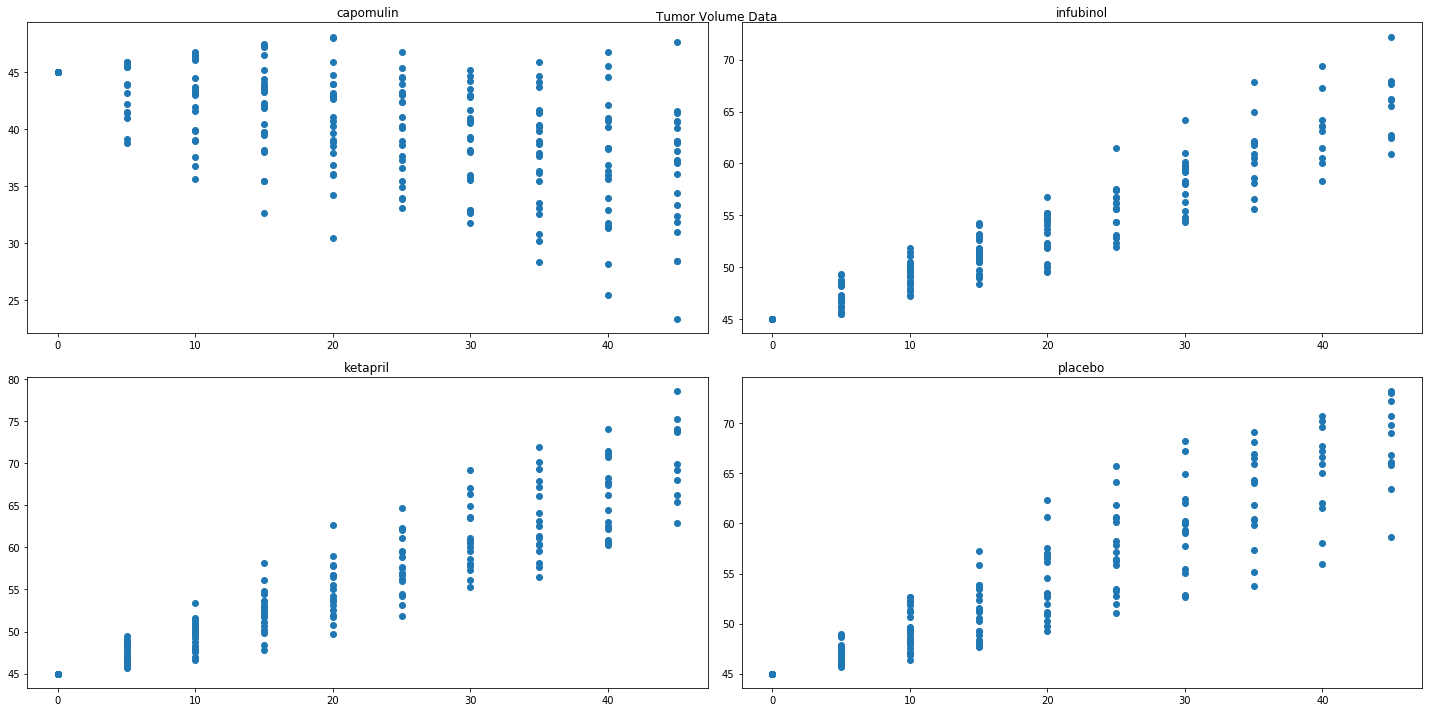

In [11]:
tumorfig = plt.figure(figsize=(20, 10))

axes1 = tumorfig.add_subplot(2, 2, 1)
axes2 = tumorfig.add_subplot(2, 2, 2)
axes3 = tumorfig.add_subplot(2, 2, 3)
axes4 = tumorfig.add_subplot(2, 2, 4)

# add a plot to each of the axes created above
axes1.plot(capomulin['Timepoint'], capomulin['tumor_vol'], 'o')
axes2.plot(infubinol['Timepoint'], infubinol['tumor_vol'], 'o')
axes3.plot(ketapril['Timepoint'], ketapril['tumor_vol'], 'o')
axes4.plot(placebo['Timepoint'], placebo['tumor_vol'], 'o')

# add a small title to each subplot

axes1.set_title("capomulin")
axes2.set_title("infubinol")
axes3.set_title("ketapril")
axes4.set_title("placebo")


tumorfig.suptitle("Tumor Volume Data")

tumorfig.tight_layout()

## METASTASES
METS Scatter plot: number of metastatic sites - changes over time for each treatment

In [12]:
data_drugs['met_diffs'] = data_drugs.groupby('mouse_id')['mets'].diff().fillna(0)

/Users/jennifershurley/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
data_drugs.tail(15)

,mouse_id,Drug,Timepoint,tumor_vol,mets,met_diffs
1891,q787,Placebo,0,45.000000,0,0.0
1892,q787,Placebo,5,47.116616,0,0.0
1893,q787,Placebo,10,48.593862,1,1.0
1894,q787,Placebo,15,49.217732,2,1.0
1895,q787,Placebo,20,50.229934,2,0.0
1896,q787,Placebo,25,52.713188,2,0.0
1897,q787,Placebo,30,55.036206,2,0.0
1898,q787,Placebo,35,60.333852,3,1.0
1899,q787,Placebo,40,62.034127,3,0.0
1900,q787,Placebo,45,66.096475,3,0.0


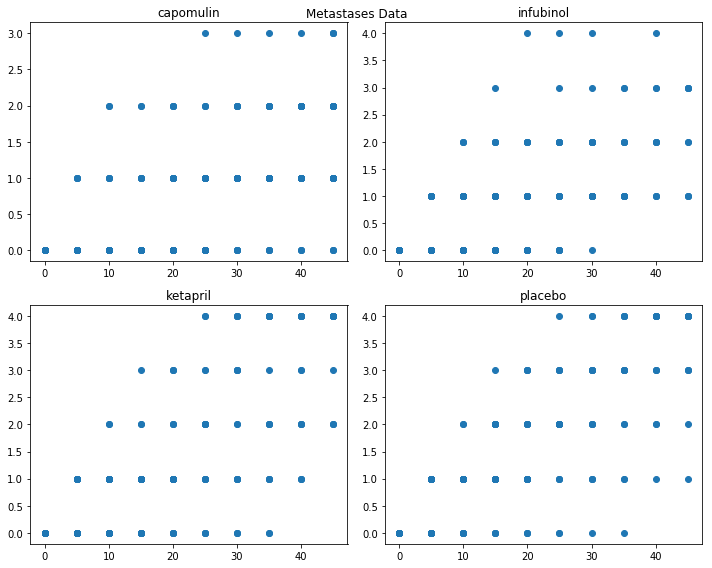

In [14]:
fig = plt.figure(figsize=(10, 8))

axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)

# add a plot to each of the axes created above
axes1.plot(capomulin['Timepoint'], capomulin['mets'], 'o')
axes2.plot(infubinol['Timepoint'], infubinol['mets'], 'o')
axes3.plot(ketapril['Timepoint'], ketapril['mets'], 'o')
axes4.plot(placebo['Timepoint'], placebo['mets'], 'o')

# add a small title to each subplot

axes1.set_title("capomulin")
axes2.set_title("infubinol")
axes3.set_title("ketapril")
axes4.set_title("placebo")


fig.suptitle("Metastases Data")

fig.tight_layout()

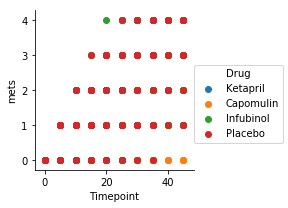

In [15]:
sns.FacetGrid(data_drugs, hue="Drug", size=3,) \
   .map(plt.scatter, "Timepoint", "mets") \
   .add_legend();
#this doesn't make any sense. need to calculate a change column? -- which I did. and it doesn't make sense either
#the overlap masks things so need subplots, maybe

## SURVIVAL RATE

SURVIVALRATE Scatter plot: number of mice still alive through the course of treatment (Survival Rate) ...
- ?one series is days since treatment and the other is % remaining
- ?see the Titanic kaggle thing? 
- "progression-free survival (PFS) statistics are more specific survival statistics.
percentage of people who don’t have new tumor growth or cancer spread during or after treatment. The rates include those whose disease responded completely or partially to treatment. They also include those whose disease is stable. That means the cancer is still there but not growing or spreading."
- http://lifelines.readthedocs.io/en/latest/Survival%20analysis%20with%20lifelines.html


In [16]:
subjects = data_drugs.groupby('mouse_id')

In [17]:
subjects_time = subjects['Timepoint']

In [18]:
subjects_time.get_group('z581')

837     0
838     5
839    10
840    15
841    20
842    25
843    30
844    35
845    40
846    45
Name: Timepoint, dtype: int64

In [19]:
subjects.first().head()
#use enumerate to give each subject an integer index? 
#subjects['index']enumerate() for s in subjects

,Drug,Timepoint,tumor_vol,mets,met_diffs
mouse_id,,,,,
a203,Infubinol,0,45.0,0,0.0
a251,Infubinol,0,45.0,0,0.0
a262,Placebo,0,45.0,0,0.0
a457,Ketapril,0,45.0,0,0.0
a577,Infubinol,0,45.0,0,0.0


In [20]:
subjects.last().head()

,Drug,Timepoint,tumor_vol,mets,met_diffs
mouse_id,,,,,
a203,Infubinol,45,67.973419,2,0.0
a251,Infubinol,45,65.525743,1,0.0
a262,Placebo,45,70.717621,4,0.0
a457,Ketapril,10,49.783419,0,0.0
a577,Infubinol,30,57.031862,2,0.0


In [21]:
subjects_time.get_group('a457')

434     0
435     5
436    10
Name: Timepoint, dtype: int64

In [97]:
subjects.tumor_vol.max().head()

mouse_id
a203    67.973419
a251    65.525743
a262    70.717621
a457    49.783419
a577    57.031862
Name: tumor_vol, dtype: float64

In [98]:
subjects.tumor_vol.min().head()

mouse_id
a203    45.0
a251    45.0
a262    45.0
a457    45.0
a577    45.0
Name: tumor_vol, dtype: float64

## Bar Graph - total % tumor volume change for each drug across the full 45 days.
- x = time
- color = drug
- y = tumor volume change (so there is a calculation to be done on df before plotting)
- groupby drug. sum all the changes -- OR SHOULD IT BE MAX - MIN, or last value(Timepoint[9]) minus first[0]?
- pull those values into series, zip, do the operation?
- http://cancerres.aacrjournals.org/content/canres/suppl/2012/07/30/0008-5472.CAN-12-0954.DC1/tab2.pdf they use initial and final volume...  then take mean, sd, sterrr for the % changes

In [92]:
subjects.get_group('a203')
#just manually checking one volumen change

,mouse_id,Drug,Timepoint,tumor_vol,mets,met_diffs
926,a203,Infubinol,0,45.000000,0,0.0
927,a203,Infubinol,5,48.508468,0,0.0
928,a203,Infubinol,10,51.852437,1,1.0
929,a203,Infubinol,15,52.777870,1,0.0
930,a203,Infubinol,20,55.173336,1,0.0
931,a203,Infubinol,25,56.793208,1,0.0
932,a203,Infubinol,30,59.523197,1,0.0
933,a203,Infubinol,35,61.931650,2,1.0
934,a203,Infubinol,40,63.593490,2,0.0
935,a203,Infubinol,45,67.973419,2,0.0


In [93]:
tumor_vol_change_per_mouse = 100*((subjects.tumor_vol.first() - subjects.tumor_vol.last()) / subjects.tumor_vol.first())

In [94]:
tumor_vol_change_per_mouse.head()

mouse_id
a203   -51.052042
a251   -45.612762
a262   -57.150268
a457   -10.629820
a577   -26.737471
Name: tumor_vol, dtype: float64

In [23]:
tumor_vol_change_per_mouse.head()

mouse_id
a203   -51.052042
a251   -45.612762
a262   -57.150268
a457   -10.629820
a577   -26.737471
Name: tumor_vol, dtype: float64

In [24]:
type(tumor_vol_change_per_mouse)
#join with the drug dataframe

pandas.core.series.Series

In [25]:
tumor_vol_change_per_mouse = tumor_vol_change_per_mouse.to_frame()

In [26]:
tumor_vol_change_per_mouse = tumor_vol_change_per_mouse.reset_index()

In [27]:
drugsdf = drugsdf.rename(columns={'Mouse ID': 'mouse_id',})

In [28]:
drugsdf = drugsdf.sort_values('mouse_id')

In [29]:
drugsdf.head()

,mouse_id,Drug
115,a203,Infubinol
102,a251,Infubinol
247,a262,Placebo
142,a275,Ceftamin
23,a366,Stelasyn


In [30]:
tumor_vol_drug_data = pd.merge(drugsdf, tumor_vol_change_per_mouse, on='mouse_id')
#key error on mouse_id??
#try to get drug another way? 

In [31]:
tumor_vol_drug_data.head()

,mouse_id,Drug,tumor_vol
0,a203,Infubinol,-51.052042
1,a251,Infubinol,-45.612762
2,a262,Placebo,-57.150268
3,a457,Ketapril,-10.629820
4,a577,Infubinol,-26.737471


In [32]:
#rename colum tumor_vol_percent_change, bar plot with error bars (see the stats module for)
#Where does it make sense to calculate sterr?

In [33]:
drug_group = tumor_vol_drug_data.groupby('Drug')['tumor_vol']

In [105]:
# ttdv = drug_group.sum()
ttdv = drug_group.mean()

In [106]:
ttdv 

Drug
Capomulin    18.516516
Infubinol   -30.442222
Ketapril    -39.569314
Placebo     -34.463143
Name: tumor_vol, dtype: float64

In [107]:
type(ttdv)

pandas.core.series.Series

In [108]:
ttdv = ttdv.to_frame()

In [109]:
ttdv

,tumor_vol
Drug,
Capomulin,18.516516
Infubinol,-30.442222
Ketapril,-39.569314
Placebo,-34.463143


In [110]:
from scipy import stats

In [111]:
tcv = tumor_vol_drug_data['tumor_vol'].tolist()

In [112]:
tcv[:5]

[-51.052041734666666,
 -45.612761893999995,
 -57.150267957999986,
 -10.629819860666665,
 -26.737470816666665]

In [113]:
stats.sem(tcv)

2.9488945437986045

In [114]:
cap_vc = tumor_vol_drug_data[tumor_vol_drug_data.Drug == "Capomulin"]
inf_vc = tumor_vol_drug_data[tumor_vol_drug_data.Drug == "Infubinol"]
ket_vc = tumor_vol_drug_data[tumor_vol_drug_data.Drug == "Ketapril"]
plac_vc = tumor_vol_drug_data[tumor_vol_drug_data.Drug == "Placebo"]

In [115]:
stats.sem(cap_vc.tumor_vol)

2.5400837010803543

In [116]:
drug_sems = [stats.sem(cap_vc.tumor_vol), stats.sem(inf_vc.tumor_vol), stats.sem(ket_vc.tumor_vol), stats.sem(plac_vc.tumor_vol)]

In [117]:
drug_sems

[2.5400837010803543, 3.3577725046093874, 4.420408998458811, 3.9442985072748358]

In [118]:
ttdv

,tumor_vol
Drug,
Capomulin,18.516516
Infubinol,-30.442222
Ketapril,-39.569314
Placebo,-34.463143


In [119]:
ttdv['error'] = drug_sems

In [120]:
ttdv

,tumor_vol,error
Drug,,
Capomulin,18.516516,2.540084
Infubinol,-30.442222,3.357773
Ketapril,-39.569314,4.420409
Placebo,-34.463143,3.944299


In [56]:
# fig, ax = plt.subplots()
# ax.bar('ttdv.Drug', 'ttdv.tumor_vol', yerr='ttdv.tv_sem', align='center', alpha=0.5, ecolor='black', capsize=10)
# ax.set_ylabel('Study Drugs')
# # ax.set_xticks()
# # ax.set_xticklabels(ttdv.Drug)
# ax.set_title('Percent Tumor Volume Change')
# ax.yaxis.grid(True)
# # ##### python bar chart positive and negative values - SEARCH
# #https://stackoverflow.com/questions/45204202/pandas-bar-plot-error-bar
# # Save the figure and show
# plt.tight_layout()
# # plt.savefig('bar_plot_with_error_bars.png')

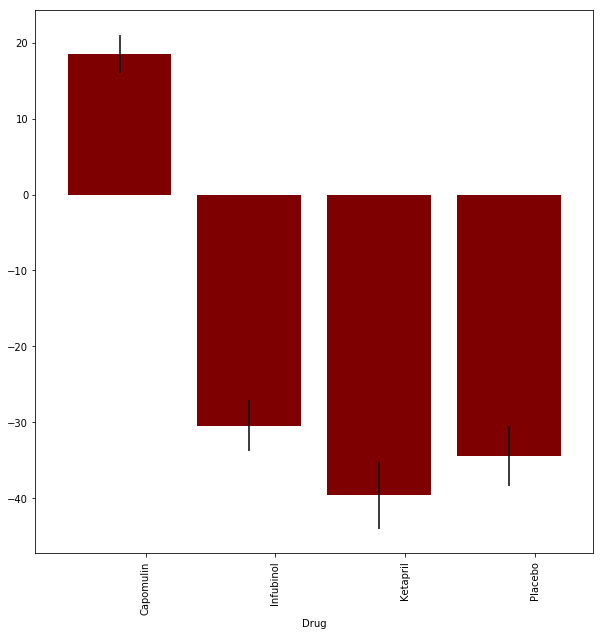

In [122]:
fig, ax = plt.subplots()

plot = ttdv['tumor_vol'].plot(kind='bar',yerr=ttdv["error"],colormap='OrRd_r',grid=False,figsize=(10,10),ax=ax,position=0.75,error_kw=dict(ecolor='black',elinewidth=1.5),width=0.8)
plt.show()

In [52]:
time_zeros = data_drugs.query('Timepoint == 0')

In [53]:
time_zeros.shape

(100, 6)

In [54]:
time_end = data_drugs.query('Timepoint == 45')
#this isn't going to help because it will have a different shape and doesn't account for the tumor volume changes for nonsurvivors

In [55]:
data_drugs.groupby('Drug')['tumor_vol'].sum()

Drug
Capomulin     9355.420462
Infubinol     9426.512387
Ketapril     10384.299876
Placebo       9780.078122
Name: tumor_vol, dtype: float64